<a href="https://colab.research.google.com/github/songmac/2023-Sesac-Lecture-and-Project/blob/master/231011_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_CNN_(all_solved).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습1. 손글씨 예측 모델을 만들어보세요 (solved)
- 데이터명 : MNIST 이미지 손글씨
- 데이터설명 : 컴퓨터 비전 데이터 세트로, 손으로 쓰여진 이미지로 구성된 데이터
- 60,000개의 train, 10,000개의 test

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

## 샘플데이터 확인

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

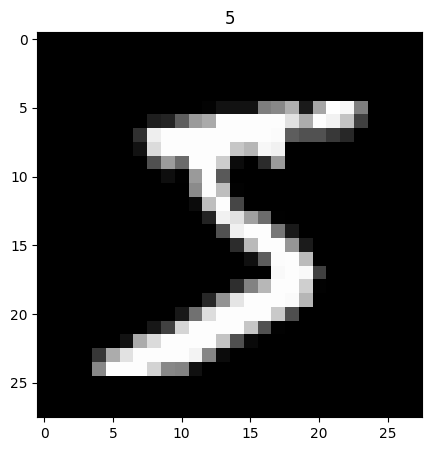

In [ ]:
import matplotlib.pyplot as plt

# 이미지 데이터를 그릴 기본 그래프 영역
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(10, 5) #크기 설정

axes.imshow(x_train[0], cmap='gray') #데이터 확인
axes.set_title(str(y_train[0]))

plt.show()

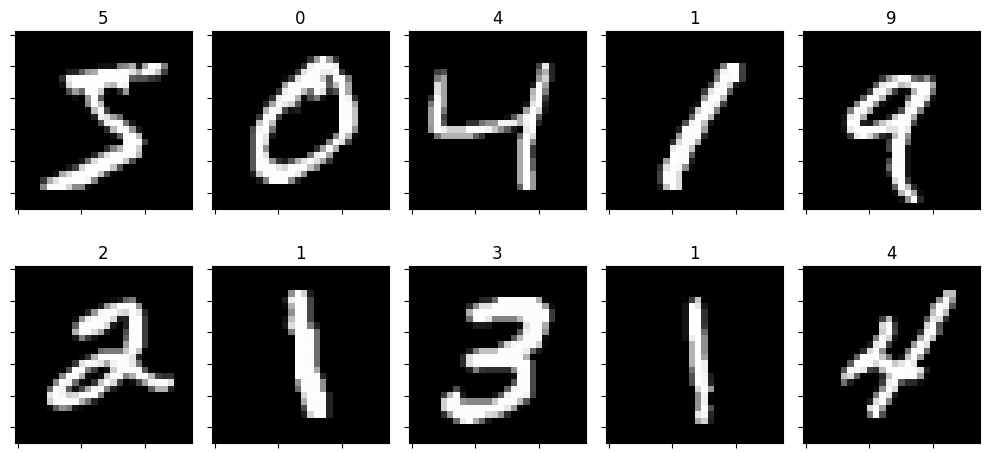

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
  axes[i//5, i%5].imshow(x_train[i],cmap='gray') #좌표상 위치 표시
  axes[i//5, i%5].set_title(str(y_train[i]))
  plt.setp(axes[i//5, i%5].get_xticklabels(), visible=False)
  plt.setp(axes[i//5, i%5].get_yticklabels(), visible=False)

plt.tight_layout() # 자동으로 여백 조정 : 선택적 사용
plt.show()

## DNN으로 MNIST 구현

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train = x_train/255.0 #tensorflow는 float 형태여야 해서 255.0으로 scale을 조정 및 정규화 해줌
x_test = x_test/255.0

# MNIST data는 각 픽셀이 0 ~ 255사이의 정수값을 가진다.
# 이런 이미지의 경우 보통 255로 나누어 0 ~ 1사이 값으로 정규화를 한다.
# 표준화는 아니지만, 양수값으로 이루어진 이미지 전처리(scaling)에 주로 사용되는 방법이다.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#  y_train[0] ???

5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape = (28,28))) #집어넣는 이미지 크기
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) #출력 # 0~9 로 카테고리가 총 10개

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam', metrics=['acc'])

In [ ]:
model.fit(x_train,y_train,
          validation_data = (x_test, y_test), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.3059 - acc: 0.9137 - val_loss: 0.1771 - val_acc: 0.9496
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1518 - acc: 0.9562 - val_loss: 0.1288 - val_acc: 0.9635
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1090 - acc: 0.9686 - val_loss: 0.1098 - val_acc: 0.9674
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0844 - acc: 0.9753 - val_loss: 0.1001 - val_acc: 0.9711
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0693 - acc: 0.9793 - val_loss: 0.0913 - val_acc: 0.9713


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest loss:',test_loss)
print('\nTest accuracy:', test_acc) #필드에서는 acc와 confusion-matrix에서 F1-score(성능지표)도 함께 봐야 함

313/313 - 1s - loss: 0.0913 - acc: 0.9713 - 726ms/epoch - 2ms/step

Test loss: 0.09126570075750351

Test accuracy: 0.9713000059127808


# CNN으로 MNIST 구현

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
# data normalization - reshape 필요
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = Sequential()
## 아래에 Conv2D를 쌓아보세요.

# 필터 5개, 커널 사이즈 = 3 * 3인 convolution layer - maxpooling 조합
model.add(Conv2D(5, 3, strides = 1, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 필터 10개, 커널 사이즈 = 3 * 3인 convolution layer - maxpooling 조합
model.add(Conv2D(10, 3, strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1차원으로 변환 후 fc layer 통과(64차원 변환 -> dropout -> 10개 클래스 확률 변환)
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax')) # 클래스 10개, softmax 적용하여 각 클래스의 확률로 변환

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [ ]:
model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 19s 5ms/step - loss: 0.2546 - acc: 0.9238 - val_loss: 0.0778 - val_acc: 0.9747
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0989 - acc: 0.9692 - val_loss: 0.0631 - val_acc: 0.9794
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0769 - acc: 0.9767 - val_loss: 0.0501 - val_acc: 0.9833
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0634 - acc: 0.9798 - val_loss: 0.0421 - val_acc: 0.9861
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0551 - acc: 0.9825 - val_loss: 0.0425 - val_acc: 0.9859


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest loss:',test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0425 - acc: 0.9859 - 615ms/epoch - 2ms/step

Test loss: 0.04245365038514137

Test accuracy: 0.9858999848365784


# 실습2. 의류 이미지 예측 모델을 만들어보세요 (solved)
- 데이터명 : Fashion MNIST
- 데이터설명 : 28 x 28 픽셀의 이미지 70,000개로 총 10개의 카테고리 (운동화, 셔츠, 샌들 등) 이미지 데이터셋

In [ ]:
# 0 : T-shirt/top
# 1 : Trouser
# 2 : Pullover
# 3 : Dress
# 4 : Coat
# 5 : Sandal
# 6 : Shirt
# 7 : Sneaker
# 8 : Bag
# 9 : Ankel boot

In [ ]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),( x_test, y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28, 1), (10000,))

In [ ]:
# data normalization - reshape 필요(3차원 데이터로 입력하기 위해 진행)
x_train = x_train.reshape(60000, 28, 28, 1) #(데이터 갯수, 픽셀, 픽셀, 채널) cf. 채널 값 : 흑백(1), 컬러(3)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

model = Sequential()

#Feature extraction 1 : 필터 5개, 커널 사이즈 = 3 * 3인 convolution layer - maxpooling 조합
#
model.add(Conv2D(5, 3, strides = 1, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Feature extraction 2 : 필터 10개, 커널 사이즈 = 3 * 3인 convolution layer - maxpooling 조합
model.add(Conv2D(10, 3, strides = 1, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Classification : 1차원으로 변환 후 fc layer 통과(64차원 변환 -> dropout -> 10개 클래스 확률 변환)
model.add(Flatten())
model.add(Dense(64, activation = 'relu')) #fc layer
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax')) # 클래스 10개, softmax 적용하여 각 클래스의 확률로 변환

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [ ]:
model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5925 - acc: 0.7851 - val_loss: 0.4215 - val_acc: 0.8495
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4004 - acc: 0.8564 - val_loss: 0.3648 - val_acc: 0.8668
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3517 - acc: 0.8722 - val_loss: 0.3281 - val_acc: 0.8832
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3242 - acc: 0.8820 - val_loss: 0.3132 - val_acc: 0.8878
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3054 - acc: 0.8878 - val_loss: 0.3019 - val_acc: 0.8930


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest loss:',test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3019 - acc: 0.8930 - 618ms/epoch - 2ms/step

Test loss: 0.30189114809036255

Test accuracy: 0.8930000066757202


## 실습3. 손모양 예측 모델을 만들어보세요 (solved)
- 데이터명 : RPS
- 데이터설명 : 2,892개의 가위, 바위, 보 손동작 제스처 이미지
- 다양한 손동작, 인종, 나이, 성별에 대한 이미지가 포함됨
- 모두 흰색 배경에 24비트 색상의 300 x 300픽셀로 이루어진 이미지 데이터

In [ ]:
# !pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
# <작업순서>
# import: 필요한 모듈 import
# 전처리: 학습에 필요한 데이터 전처리를 수행합니다.
# 모델링(model): 모델을 정의합니다.
# 컴파일(compile): 모델을 생성합니다.
# 학습 (fit): 모델을 학습시킵니다.

import urllib.request
import zipfile
import numpy as np
from IPython.display import Image

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/rps.zip' #url로부터 데이터 받아오기
urllib.request.urlretrieve(url, 'rps.zip')
local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r') #읽기모드
zip_ref.extractall('tmp/') #colab에 저장
zip_ref.close() #파일 닫기

TRAINING_DIR = "tmp/rps/" #train_data 디렉토리 설정

In [ ]:
training_datagen = ImageDataGenerator( #데이터 로딩 #x, y 값이 묶여져 있음
    rescale=1. / 255, #imagedatagenerator 사용 선언 및 scale
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 #train_data:8, test_data:2 비율로 설정?
    )

In [ ]:
training_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                          batch_size=32,
                                                          target_size=(150, 150),
                                                          class_mode='categorical',
                                                          subset='training',
                                                         )

validation_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                          batch_size=32,
                                                          target_size=(150, 150),
                                                          class_mode='categorical',
                                                          subset='validation',
                                                         )

Found 2016 images belonging to 3 classes.
Found 504 images belonging to 3 classes.


In [ ]:
training_generator[0]

(array([[[[0.9979901 , 0.9979901 , 0.9979901 ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [0.9983594 , 0.9983594 , 0.9983594 ]],
 
         [[0.9960785 , 0.9960785 , 0.9960785 ],
          [0.9995383 , 0.9995383 , 0.9995383 ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9984661 , 0.9984661 , 0.9984661 ],
          [0.99658674, 0.99658674, 0.99658674],
          [0.9974496 , 0.9974496 , 0.9974496 ]],
 
         [[0.9960785 , 0.9960785 , 0.9960785 ],
          [0.99757016, 0.99757016, 0.99757016],
          [1.        , 1.        , 1.        ],
          ...,
          [0.9973428 , 0.9973428 , 0.9973428 ],
          [0.99922216, 0.99922216, 0.99922216],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.992522  , 0.992522  , 0.992522  ],
          [0.99518

In [ ]:
 validation_generator[0]

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.9945865 , 0.9945865 , 0.9945865 ],
          [0.99607

오리지널 사진 파일
Found 2520 images belonging to 3 classes.
(128, 150, 150, 3) (128, 3)
[1. 0. 0.]


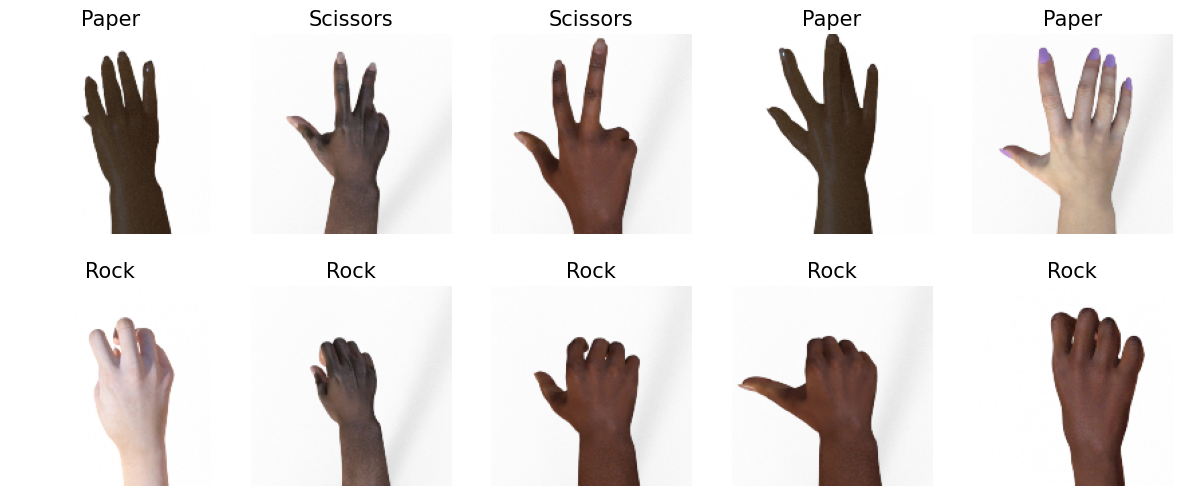

Augmentation 적용한 사진 파일
(32, 150, 150, 3) (32, 3)
[0. 1. 0.]


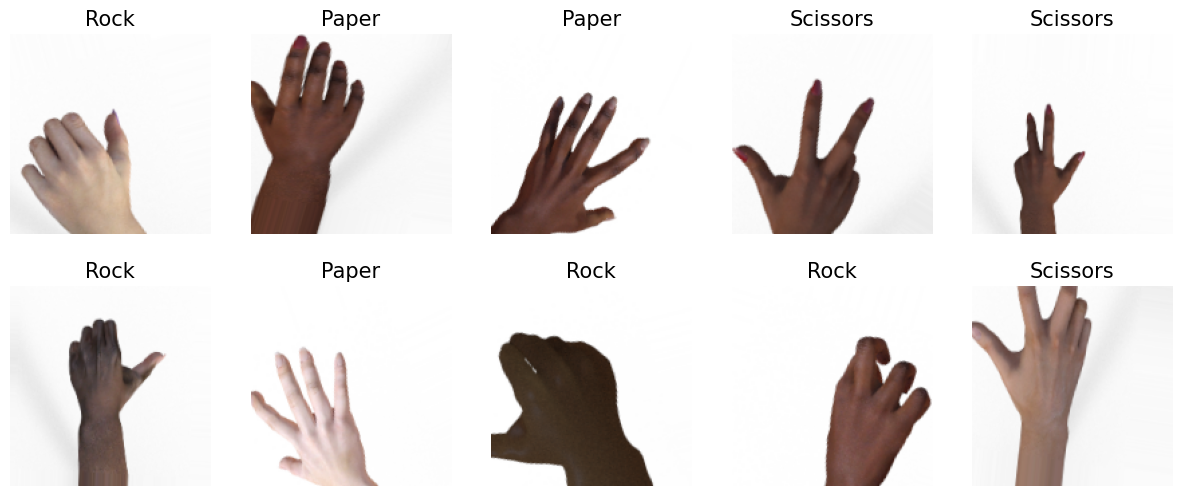

In [ ]:
import matplotlib.pyplot as plt

class_map = {
    0: 'Paper',
    1: 'Rock',
    2: 'Scissors'
}

print('오리지널 사진 파일')

original_datagen = ImageDataGenerator(rescale=1./255)
original_generator = original_datagen.flow_from_directory(TRAINING_DIR,
                                                          batch_size=128,
                                                          target_size=(150, 150),
                                                          class_mode='categorical'
                                                         )

for x, y in original_generator:
    print(x.shape, y.shape)
    print(y[0])

    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')
    plt.show()
    break

print('Augmentation 적용한 사진 파일')

for x, y in training_generator:
    print(x.shape, y.shape)
    print(y[0])

    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')

    plt.show()
    break

In [ ]:
model = Sequential([
    # Conv2D, MaxPooling2D 조합으로 층을 쌓습니다. 첫번째 입력층의 input_shape은 (150, 150, 3)으로 지정합니다.
    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # 2D -> 1D로 변환을 위하여 Flatten 합니다.
    Flatten(),
    # 과적합 방지를 위하여 Dropout을 적용합니다.
    Dropout(0.5),
    Dense(512, activation='relu'),
    # Classification을 위한 Softmax
    # 출력층의 갯수는 클래스의 갯수와 동일하게 맞춰줍니다 (3개), activation도 잊지마세요!
    Dense(3, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
checkpoint_path = "tmp_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

In [ ]:
# epochs=25
history = model.fit(training_generator,
                    validation_data=(validation_generator),
                    epochs=20,
                    callbacks=[checkpoint],
                   )

Epoch 1/20
63/63 [==============================] - ETA: 0s - loss: 1.0999 - acc: 0.3810
Epoch 1: val_loss improved from inf to 1.10280, saving model to tmp_checkpoint.ckpt
63/63 [==============================] - 31s 374ms/step - loss: 1.0999 - acc: 0.3810 - val_loss: 1.1028 - val_acc: 0.3889
Epoch 2/20
63/63 [==============================] - ETA: 0s - loss: 0.8347 - acc: 0.6215
Epoch 2: val_loss improved from 1.10280 to 1.05837, saving model to tmp_checkpoint.ckpt
63/63 [==============================] - 28s 450ms/step - loss: 0.8347 - acc: 0.6215 - val_loss: 1.0584 - val_acc: 0.4940
Epoch 3/20
63/63 [==============================] - ETA: 0s - loss: 0.4828 - acc: 0.8085
Epoch 3: val_loss improved from 1.05837 to 0.64336, saving model to tmp_checkpoint.ckpt
63/63 [==============================] - 23s 368ms/step - loss: 0.4828 - acc: 0.8085 - val_loss: 0.6434 - val_acc: 0.7937
Epoch 4/20
63/63 [==============================] - ETA: 0s - loss: 0.3701 - acc: 0.8611
Epoch 4: val_loss 

In [ ]:
# checkpoint 를 저장한 파일명을 입력합니다.
model.load_weights(checkpoint_path)

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

print('\nTest loss:',test_loss)
print('\nTest accuracy:', test_acc)

16/16 - 4s - loss: 0.2767 - acc: 0.9048 - 4s/epoch - 237ms/step

Test loss: 0.2767416536808014

Test accuracy: 0.9047619104385376
